In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns


In [160]:
# Import the data
df1 = pd.read_csv("../data/artist_data.csv")  #..(relative path, goes to the parent directory) vs. C:Users (absolute path)
df2 = pd.read_csv("../data/artwork_data.csv")

C:\Users\jenny\AppData\Local\Temp\ipykernel_30792\2521364596.py:3: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("../data/artwork_data.csv")


### Merge two dataframes

In [161]:
# Select the desired columns from df1
df1_selected = df1[['id', 'name', 'yearOfBirth', 'gender']]

# Select the desired columns from df2
df2_selected = df2[['artistId', 'year', 'acquisitionYear']]

# Merge the selected columns based on artistId
merged_df = pd.merge(df1_selected, df2_selected, left_on='id', right_on='artistId')

# Select the final columns for the new data frame
result_df = merged_df[['name', 'yearOfBirth', 'gender', 'year', 'acquisitionYear']]

# Display the resulting data frame
print(result_df)

                         name  yearOfBirth  gender    year  acquisitionYear
0      Abakanowicz, Magdalena       1930.0  Female    1978           2009.0
1      Abakanowicz, Magdalena       1930.0  Female    1969           2009.0
2      Abakanowicz, Magdalena       1930.0  Female    1971           2009.0
3      Abakanowicz, Magdalena       1930.0  Female    1976           2009.0
4         Abbey, Edwin Austin       1852.0    Male  1882.0           1924.0
...                       ...          ...     ...     ...              ...
69190         Zorio, Gilberto       1944.0    Male    1971           2009.0
69191              Zox, Larry       1936.0    Male  1965.0           1968.0
69192   Zuccarelli, Francesco       1702.0    Male  1765.0           1985.0
69193        Zuloaga, Ignacio       1870.0    Male  1905.0           1923.0
69194         Zyw, Aleksander       1905.0    Male  1957.0           1962.0

[69195 rows x 5 columns]


### Tidy up the data

In [162]:
# Check if any 'yearOfBirth' values are greater than 'acquisitionYear'
inconsistent_data = result_df[result_df['yearOfBirth'] > result_df['acquisitionYear']]

# Display the inconsistent data, if any
if len(inconsistent_data) > 0:
    print("Inconsistent data found:")
    print(inconsistent_data)
else:
    print("No inconsistent data found. All 'yearOfBirth' values are less than 'acquisitionYear'.")

No inconsistent data found. All 'yearOfBirth' values are less than 'acquisitionYear'.


In [163]:
# Convert 'year' column to numeric
result_df['year'] = pd.to_numeric(result_df['year'], errors='coerce')

# Find the minimum year for each artist
unique_df = result_df.groupby('name').agg({'year': 'min'}).reset_index()

# Merge with the original dataframe to retrieve the additional columns
unique_df = pd.merge(unique_df, result_df, on=['name', 'year'], how='left')

# Display the resulting dataframe
print(unique_df)

                        name    year  yearOfBirth  gender  acquisitionYear
0     Abakanowicz, Magdalena  1969.0       1930.0  Female           2009.0
1        Abbey, Edwin Austin  1882.0       1852.0    Male           1924.0
2           Abbott, Berenice  1935.0       1898.0  Female           2010.0
3     Abbott, Lemuel Francis     NaN       1760.0    Male           1885.0
4     Abbott, Lemuel Francis     NaN       1760.0    Male           1968.0
...                      ...     ...          ...     ...              ...
6155         Zyw, Aleksander  1957.0       1905.0    Male           1962.0
6156         di Suvero, Mark  1976.0       1933.0    Male           2004.0
6157            van Elk, Ger  1976.0       1941.0    Male           1980.0
6158       Štyrský, Jindrich  1934.0       1899.0    Male           2007.0
6159       Štyrský, Jindrich  1934.0       1899.0    Male           2007.0

[6160 rows x 5 columns]


C:\Users\jenny\AppData\Local\Temp\ipykernel_30792\2555363441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['year'] = pd.to_numeric(result_df['year'], errors='coerce')


In [164]:
# Find the earliest acquisition year for each unique name
filtered_df = unique_df.groupby('name').agg({'acquisitionYear': 'min'}).reset_index()

# Merge with the original dataframe to retrieve the additional columns
filtered_df = pd.merge(filtered_df, unique_df, on=['name', 'acquisitionYear'], how='left')

# Display the resulting dataframe
print(filtered_df)

                        name  acquisitionYear    year  yearOfBirth  gender
0     Abakanowicz, Magdalena           2009.0  1969.0       1930.0  Female
1        Abbey, Edwin Austin           1924.0  1882.0       1852.0    Male
2           Abbott, Berenice           2010.0  1935.0       1898.0  Female
3     Abbott, Lemuel Francis           1885.0     NaN       1760.0    Male
4             Abrahams, Ivor           1986.0  1967.0       1935.0    Male
...                      ...              ...     ...          ...     ...
5807         Zyw, Aleksander           1962.0  1957.0       1905.0    Male
5808         di Suvero, Mark           2004.0  1976.0       1933.0    Male
5809            van Elk, Ger           1980.0  1976.0       1941.0    Male
5810       Štyrský, Jindrich           2007.0  1934.0       1899.0    Male
5811       Štyrský, Jindrich           2007.0  1934.0       1899.0    Male

[5812 rows x 5 columns]


In [165]:
# Drop duplicate names and keep only the first occurrence
unique_names_df = filtered_df.drop_duplicates(subset='name', keep='first')

# Display the resulting dataframe
print(unique_names_df)

                        name  acquisitionYear    year  yearOfBirth  gender
0     Abakanowicz, Magdalena           2009.0  1969.0       1930.0  Female
1        Abbey, Edwin Austin           1924.0  1882.0       1852.0    Male
2           Abbott, Berenice           2010.0  1935.0       1898.0  Female
3     Abbott, Lemuel Francis           1885.0     NaN       1760.0    Male
4             Abrahams, Ivor           1986.0  1967.0       1935.0    Male
...                      ...              ...     ...          ...     ...
5806        Zuloaga, Ignacio           1923.0  1905.0       1870.0    Male
5807         Zyw, Aleksander           1962.0  1957.0       1905.0    Male
5808         di Suvero, Mark           2004.0  1976.0       1933.0    Male
5809            van Elk, Ger           1980.0  1976.0       1941.0    Male
5810       Štyrský, Jindrich           2007.0  1934.0       1899.0    Male

[3332 rows x 5 columns]


#### Find out the difference between year of birth of the artists and their earliest acquisition year of an artwork.

In [166]:
# Calculate the year difference
unique_names_df['yearDifference'] = unique_names_df['acquisitionYear'] - unique_names_df['yearOfBirth']

# Display the resulting dataframe
print(unique_names_df)

                        name  acquisitionYear    year  yearOfBirth  gender   
0     Abakanowicz, Magdalena           2009.0  1969.0       1930.0  Female  \
1        Abbey, Edwin Austin           1924.0  1882.0       1852.0    Male   
2           Abbott, Berenice           2010.0  1935.0       1898.0  Female   
3     Abbott, Lemuel Francis           1885.0     NaN       1760.0    Male   
4             Abrahams, Ivor           1986.0  1967.0       1935.0    Male   
...                      ...              ...     ...          ...     ...   
5806        Zuloaga, Ignacio           1923.0  1905.0       1870.0    Male   
5807         Zyw, Aleksander           1962.0  1957.0       1905.0    Male   
5808         di Suvero, Mark           2004.0  1976.0       1933.0    Male   
5809            van Elk, Ger           1980.0  1976.0       1941.0    Male   
5810       Štyrský, Jindrich           2007.0  1934.0       1899.0    Male   

      yearDifference  
0               79.0  
1               7

C:\Users\jenny\AppData\Local\Temp\ipykernel_30792\3456388171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_names_df['yearDifference'] = unique_names_df['acquisitionYear'] - unique_names_df['yearOfBirth']


In [173]:
# Find the greatest and least yearDifference for females
max_year_difference_female = unique_names_df[unique_names_df['gender'] == 'Female']['yearDifference'].max()
min_year_difference_female = unique_names_df[unique_names_df['gender'] == 'Female']['yearDifference'].min()

# Find the greatest and least yearDifference for males
max_year_difference_male = unique_names_df[unique_names_df['gender'] == 'Male']['yearDifference'].max()
min_year_difference_male = unique_names_df[unique_names_df['gender'] == 'Male']['yearDifference'].min()

# Display the results
print("Greatest yearDifference (Female):", max_year_difference_female)
print("Least yearDifference (Female):", min_year_difference_female)
print("Greatest yearDifference (Male):", max_year_difference_male)
print("Least yearDifference (Male):", min_year_difference_male)

Greatest yearDifference (Female): 378.0
Least yearDifference (Female): 22.0
Greatest yearDifference (Male): 440.0
Least yearDifference (Male): 9.0


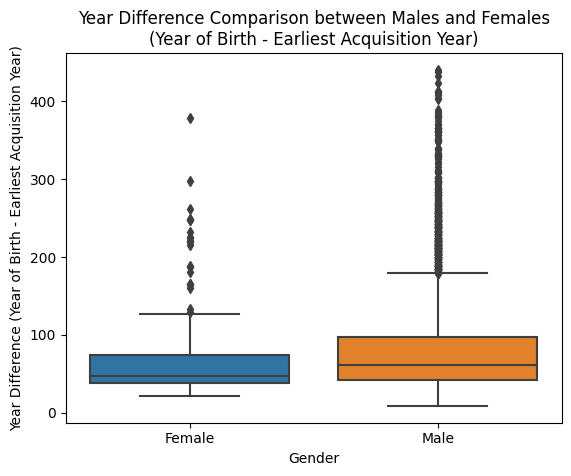

In [176]:
# Create a box plot comparing the yearDifference between males and females
sns.boxplot(x='gender', y='yearDifference', data=unique_names_df)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Year Difference (Year of Birth - Earliest Acquisition Year)')
plt.title('Year Difference Comparison between Males and Females\n(Year of Birth - Earliest Acquisition Year)')

# Show the plot
plt.show()

In [167]:
# Define the bin edges for the periods
bins = [0, 1600, 1700, 1800, 1900, 2023]

# Define the labels for the periods
labels = ['Before 1600', '1600-1699', '1700-1799', '1800-1899', '1900 and later']

# Split 'yearOfBirth' into periods using pd.cut
unique_names_df['period'] = pd.cut(unique_names_df['yearOfBirth'], bins=bins, labels=labels, right=False)

# Group by 'period' and count the number of male and female artists
comparison_df = unique_names_df.groupby('period')['gender'].value_counts().unstack().fillna(0)

# Rename the column names for clarity
comparison_df.columns = ['male', 'female']

# Display the comparison dataframe
print(comparison_df)

                male  female
period                      
Before 1600        0      16
1600-1699          1      60
1700-1799         13     371
1800-1899         91     891
1900 and later   379    1435


C:\Users\jenny\AppData\Local\Temp\ipykernel_30792\334941910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_names_df['period'] = pd.cut(unique_names_df['yearOfBirth'], bins=bins, labels=labels, right=False)


In [168]:
# Calculate the mean yearDifference of females in each period
mean_year_difference_female = unique_names_df[unique_names_df['gender'] == 'Female'].groupby('period')['yearDifference'].mean()

# Display the mean yearDifference of females in each period
print(mean_year_difference_female)

period
Before 1600              NaN
1600-1699         378.000000
1700-1799         232.307692
1800-1899          78.681319
1900 and later     50.857520
Name: yearDifference, dtype: float64


In [169]:
# Calculate the mean yearDifference of males in each period
mean_year_difference_male = unique_names_df[unique_names_df['gender'] == 'Male'].groupby('period')['yearDifference'].mean()

# Display the mean yearDifference of males in each period
print(mean_year_difference_male)

period
Before 1600       399.187500
1600-1699         320.116667
1700-1799         195.778976
1800-1899          81.771044
1900 and later     51.009756
Name: yearDifference, dtype: float64


In [170]:
# Combine the mean yearDifference values for males and females into a single dataframe
combined_df = pd.concat([mean_year_difference_female, mean_year_difference_male], axis=1)
combined_df.columns = ['Mean Year Difference (Female)', 'Mean Year Difference (Male)']

# Display the combined dataframe
print(combined_df)

                Mean Year Difference (Female)  Mean Year Difference (Male)
period                                                                    
Before 1600                               NaN                   399.187500
1600-1699                          378.000000                   320.116667
1700-1799                          232.307692                   195.778976
1800-1899                           78.681319                    81.771044
1900 and later                      50.857520                    51.009756


In [172]:
# Combine the comparison_df and combined_df dataframes
final_df = pd.concat([comparison_df, combined_df], axis=1)

# Display the final combined dataframe
final_df

,male,female,Mean Year Difference (Female),Mean Year Difference (Male)
period,,,,
Before 1600,0,16,NaN,399.187500
1600-1699,1,60,378.000000,320.116667
1700-1799,13,371,232.307692,195.778976
1800-1899,91,891,78.681319,81.771044
1900 and later,379,1435,50.857520,51.009756


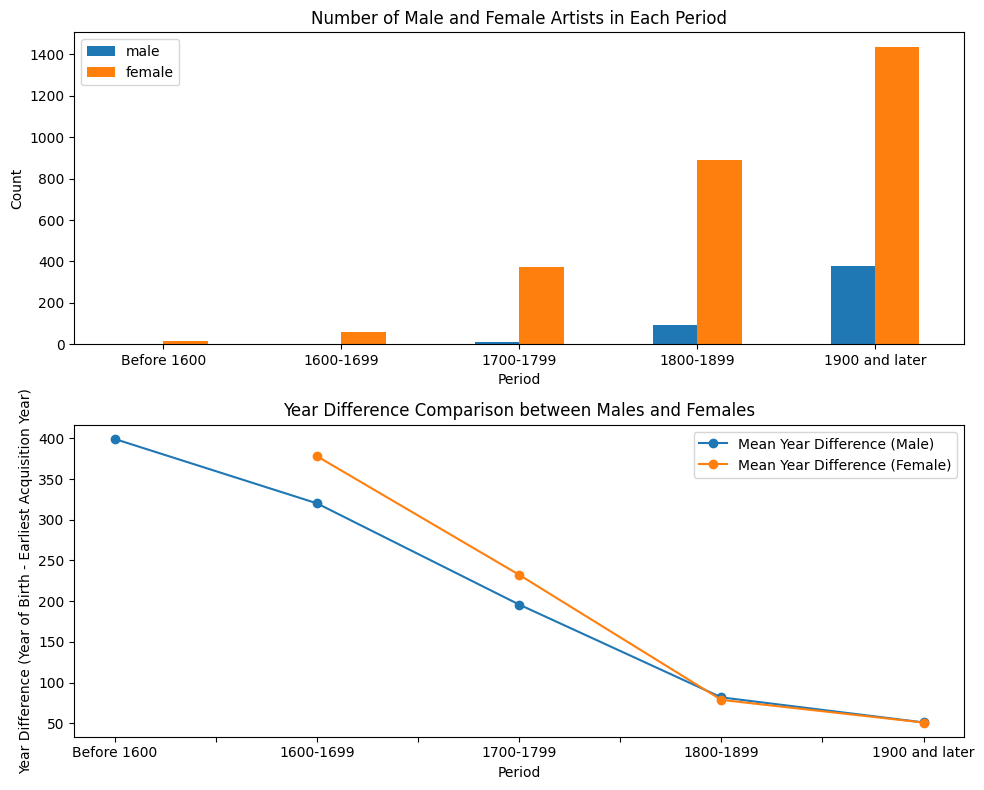

In [185]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of male and female artists in each period
final_df[['male', 'female']].plot(kind='bar', ax=ax1)
ax1.set_xlabel('Period')
ax1.set_ylabel('Count')
ax1.set_title('Number of Male and Female Artists in Each Period')
ax1.legend(loc='upper left')
ax1.set_xticklabels(final_df.index, rotation=0)

# Plot the Year Difference Comparison between Males and Females
final_df[['Mean Year Difference (Male)', 'Mean Year Difference (Female)']].plot(kind='line', marker='o', ax=ax2)
ax2.set_xlabel('Period')
ax2.set_ylabel('Year Difference (Year of Birth - Earliest Acquisition Year)')
ax2.set_title('Year Difference Comparison between Males and Females')
ax2.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()